<a href="https://colab.research.google.com/github/gabrielsperez/CIFAR-10-Classification/blob/master/MLP_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3-Layer MLP Classifier using CIFAR10 Dataset**
1. The model was implemented and trained using Google Colab
2. The model uses dropout for Regularization
3.  It uses ReLU for the hidden layers and softmax for the output layer

In [0]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical  
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import optimizers
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Load the dataset

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = np.reshape(x_train,(50000,3072))
x_test = np.reshape(x_test,(10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 20s 0us/step


Build the model and configure it for training

In [0]:
model = Sequential()

model.add(Dense(1024,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1024, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1024,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Fit the model

In [0]:
history = model.fit(x_train,y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 33s 817us/step - loss: 2.0447 - acc: 0.3120 - val_loss: 1.8673 - val_acc: 0.3302
Epoch 2/100
40000/40000 [==============================] - 28s 700us/step - loss: 1.7976 - acc: 0.3710 - val_loss: 1.9490 - val_acc: 0.3373
Epoch 3/100
40000/40000 [==============================] - 28s 698us/step - loss: 1.7148 - acc: 0.3922 - val_loss: 1.8523 - val_acc: 0.3483
Epoch 4/100
40000/40000 [==============================] - 29s 714us/step - loss: 1.6592 - acc: 0.4106 - val_loss: 1.7069 - val_acc: 0.3869
Epoch 5/100
40000/40000 [==============================] - 29s 717us/step - loss: 1.6278 - acc: 0.4215 - val_loss: 1.8234 - val_acc: 0.3754
Epoch 6/100
40000/40000 [==============================] - 27s 684us/step - loss: 1.594

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 54.44%


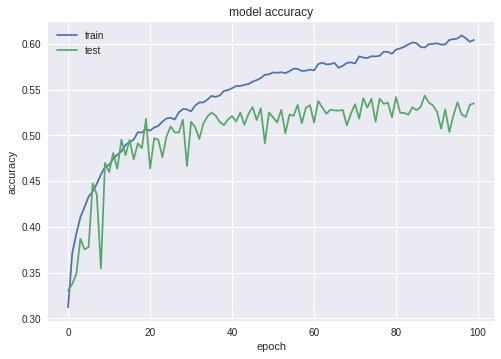

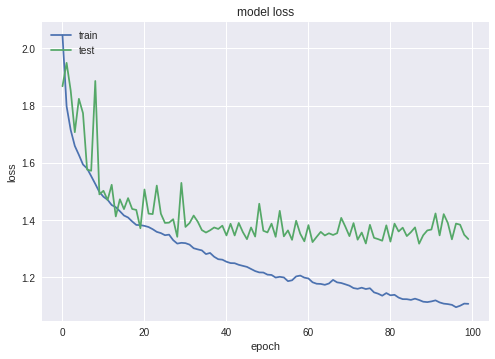

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()